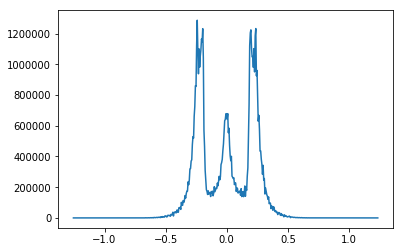

In [8]:
from scipy import constants as sp
import os
import numpy as np
from matplotlib import pyplot as plt
from qsd.data_processing import readcomsol,postproc,setparams

# Read data from downloads
file_dbx = os.getcwd() + '/downloads/exports/Bx_fullData.csv'
file_dby = os.getcwd() + '/downloads/exports/By_fullData.csv'

rdx = readcomsol.ReadComsol(file_dbx)
rdy = readcomsol.ReadComsol(file_dby)

# Read csv file, and get x,y annd dbx/dby data for each
# blocked point in space
bx_x,bx_y,bx_z = rdx.read_full_data()
by_x,by_y,by_z = rdy.read_full_data()

dbx = np.asarray(bx_z).astype(np.float)
dby = np.asarray(by_z).astype(np.float)

# # Define geometry of the superconductor
setp = setparams.SetParams()
params = setp.set_params("cpw_parameters.txt")

w = params["w"]
t = params["t"]
l = params["l"]
pen = params["pen"]
omega = params["omega"]
Z = params["Z"]

# Postprocess data
post = postproc.PostProc(w,t,l,pen,omega,Z)

# Single spin coupling for each point on mesh grid
g = post.coupling(dbx,dby,theta=0)

# Calculate total B1 field
theta = 0
B1 = post.B1(dbx, dby, theta)

# Calculate Larmor frequency
gamma = 4.32e07 # Bismuth gyromagnetic ratio (rad/T*s)
omega_larmor = post.larmor_omega(B1,gamma)
tau = 1
theta_larmor = post.larmor_theta(omega_larmor, tau)

lardens, laredge = post.larmor_density(bx_x,by_y,theta_larmor)

# Weight theta with contribution to spin signal
g_weight = np.zeros(len(laredge))
for i in range (0,len(laredge)-1):
    g_weight[i] = sum(g[np.where(np.logical_and(theta_larmor>=laredge[i], theta_larmor<=laredge[i+1]))])

rho_weighted = lardens * g_weight**2

plt.plot(laredge,rho_weighted)
plt.show()

In [5]:
Z

50.0